# Part 4: Process vector and raster data together in Python

In [ ]:
# If on Colab: uncomment and execute the following line
# ! pip install geopandas rioxarray

### Read vector and raster data

In [1]:
import rioxarray

# Load raster
raster = rioxarray.open_rasterio('../data/S2B_31UFU_20200326_0_L2A_TCI_small.tif')

In [2]:
import geopandas as gpd

# Load vector
path_fields = '../data/fields.shp'
fields = gpd.read_file(path_fields)

### Crop raster data

In [3]:
# Convert the CRS of fields to "raster" 
fields = fields.to_crs(raster.rio.crs)

In [4]:
# Crop the raster data with the bounding box of fields, using ".rio.clip_box"
raster_clip_box = raster.rio.clip_box(*fields.total_bounds)

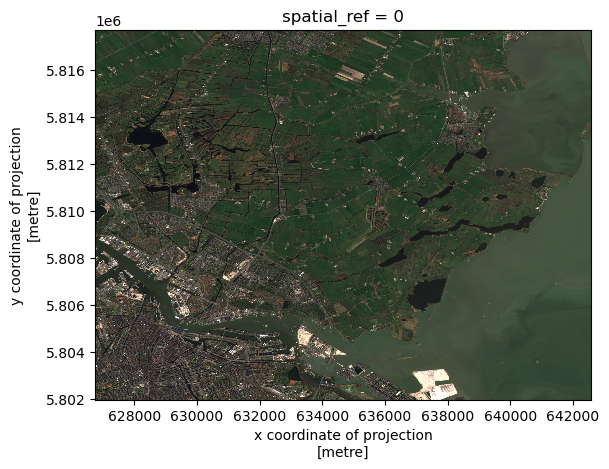

In [5]:
# Visualize the clip_box results
raster_clip_box.plot.imshow()

### Clip raster data with the vector data

In [6]:
# Clip the raster with the ".rio.clip" function, and the geometry column of fields
fields_geom = fields['geometry']
raster_clip = raster_clip_box.rio.clip(fields_geom)

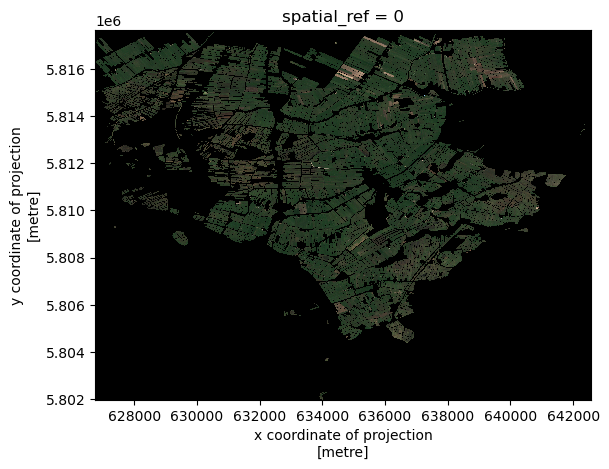

In [7]:
# visualize clipping results
raster_clip.plot.imshow()